# About this notebook

Here, we will demonstrate how to use the code in TremaineWeinberg.py, using the strongly barred example shown in Géron et al. (2022). We will reproduce Figures 2, 3, 4 and 5 from the paper.

# Imports

In [1]:
import pandas as pd
from TremaineWeinberg import Tremaine_Weinberg
import numpy as np
import time
from marvin.tools.maps import Maps
import matplotlib.pyplot as plt

[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/geron/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/geron/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


# Code

In [3]:
# Retrieve data for target

plateifu = '11956-12702'
#plateifu = '8323-6101'

maps = Maps(plateifu = plateifu, bintype='VOR10')

df_inputs = pd.read_csv('tables_geron2022/Table1.csv')
i = np.where(df_inputs['PLATEIFU'] == plateifu)[0][0]

inc = df_inputs['inc'][i]
inc_err = df_inputs['inc_err'][i]
PA = df_inputs['PA'][i]

PA_err = df_inputs['PA_err'][i]
L_bar = df_inputs['R_bar'][i] * 2 
L_bar_err = df_inputs['R_bar_err'][i] * 2

PA_bar = df_inputs['PA_bar'][i]
PA_bar_err = df_inputs['PA_bar_err'][i]

print(f'Galaxy plateifu: {plateifu}')
print(f'Inclination: {np.round(inc,2)}+-{np.round(inc_err,2)} deg')
print(f'Position angle: {np.round(PA,2)}+-{np.round(PA_err,2)} deg')
print(f'Bar length: {np.round(L_bar,2)}+-{np.round(L_bar_err,2)} arcsec')
print(f'Position angle of the bar: {np.round(PA_bar,2)}+-{np.round(PA_bar_err,2)} deg')

Galaxy plateifu: 11956-12702
Inclination: 60.81+-1.05 deg
Position angle: 55.2+-0.53 deg
Bar length: 26.93+-0.97 arcsec
Position angle of the bar: 75.56+-0.09 deg


In [4]:
# Perform TW method
# For most accurate estimates, do n_iter >= 1000. 

start_time = time.time()

np.warnings.filterwarnings('ignore')

tw = Tremaine_Weinberg(PA, inc, L_bar, PA_bar, maps, PA_err = PA_err, inc_err = inc_err,
                       barlen_err = L_bar_err, PA_bar_err = PA_bar_err,
                      n_iter = 0, min_slit_length = 0)

print(f'{np.round(time.time() - start_time,2)} seconds elapsed.')

4.59 seconds elapsed.


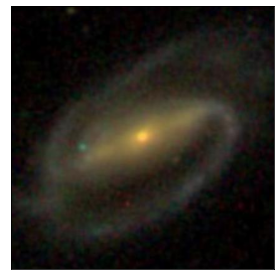

In [5]:
# You can look at the galaxy by doing (image is from SDSS, obtained through Marvin)
tw.plot_img()

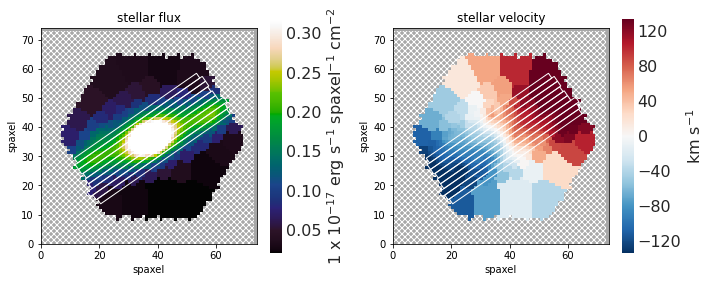

In [6]:
# You can plot various maps, similar to Figure 2 in Géron et al. (2022) by doing:
tw.plot_maps(plot_apers = True)

# The plot_apers parameter plots the apertures used on top of the maps.  

# By default it plots the stellar flux and stellar velocity. But you can also plot X_Sigma and V_Sigma.
# This can be done by doing:
# tw.plot_maps(maps = ['stellar_flux','stellar_vel','X_Sigma','V_Sigma'])


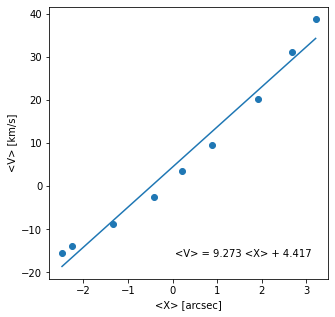

The NRMSE on this fit is: 0.0516


(9.272741665338028, 4.417194136075756)

In [7]:
# You can also check whether the different slits agree with each other, by inspecting the <X> vs <V> plot.
# This is similar to Figure 3 in Géron et al. (2022)

tw.plot_X_V()

# You can access the NRMSE on this fit by doing:
print(f'The NRMSE on this fit is: {np.round(tw.NRMSE_X_V,4)}')


tw.fitted_line[0][0], tw.fitted_line[0][1]

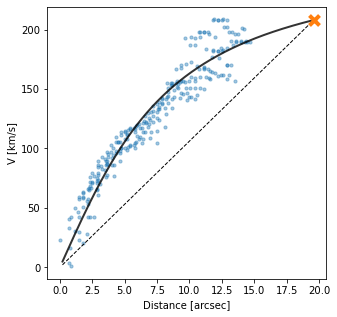

In [8]:
# One can also visualise how to corotation radius (Rcr) is obtained by plotting the velocity curve,
# which is similar to Figure 4 in Géron et al. (2022):

tw.plot_V_curve()

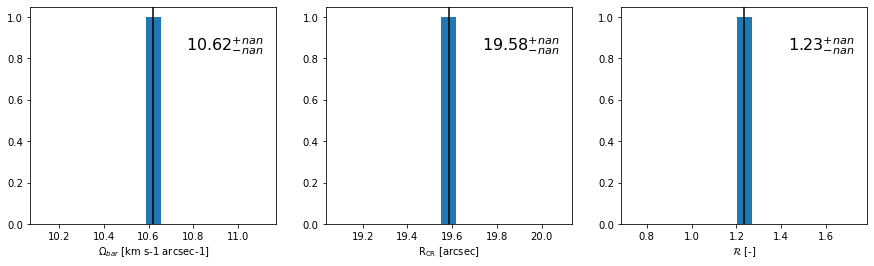

10.621144676630287 19.5842894621981 1.234564628368409


In [9]:
# Finally, one can see the final histograms of the bar pattern speed, corotation radius and curly R,
# as shown in Figure 5 of Géron et al. (2022), by doing:

tw.plot_hist_MC(variables = ['Omega','R_corot','R'])

print(tw.Omega, tw.R_corot, tw.R)

In [10]:
# You can directly access the bar pattern speed, corotation radius and curly R values like this:

Omega = tw.Omega
Rcr = tw.R_corot
R = tw.R

print(f'For target with plateifu {plateifu}, we obtain:')
print(f'Omega = {np.round(Omega,2)} km s-1 arcsec-1')
print(f'Rcr = {np.round(Rcr,2)} arcsec')
print(f'R = {np.round(R,2)}')

For target with plateifu 11956-12702, we obtain:
Omega = 10.62 km s-1 arcsec-1
Rcr = 19.58 arcsec
R = 1.23


In [11]:
# Compare with results from paper

df_results = pd.read_csv('tables_geron2022/Table3.csv')
i = np.where(df_results['PLATEIFU'] == plateifu)[0][0]

Omega_paper = df_results['Omega'][i]
Rcr_paper = df_results['Rcr'][i]
R_paper = df_results['R'][i]

print(Omega, Omega_paper,np.abs(Omega - Omega_paper))
print(Rcr, Rcr_paper,np.abs(Rcr - Rcr_paper))
print(R, R_paper,np.abs(R - R_paper))

10.621144676630287 10.708504869245246 0.08736019261495898
19.5842894621981 19.436476051867945 0.14781341033015494
1.234564628368409 1.2232049088291914 0.01135971953921766


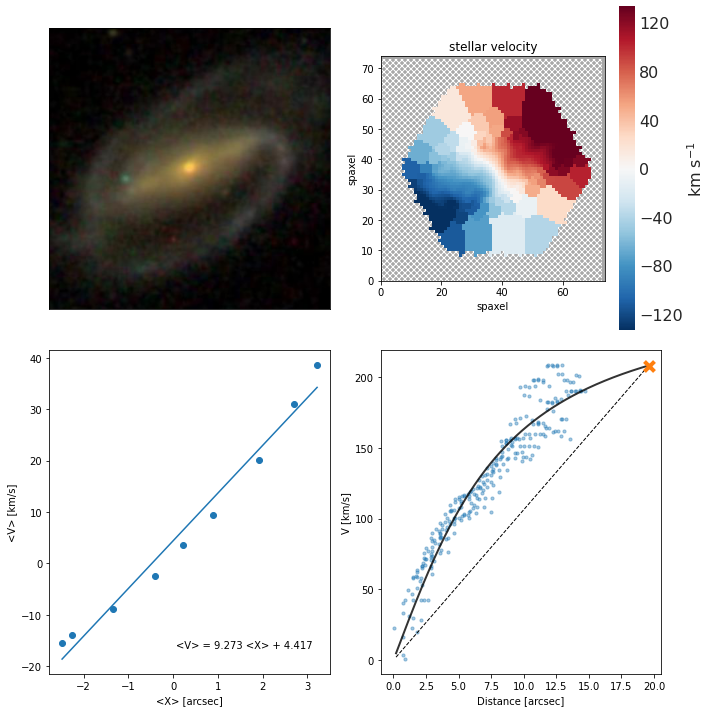

In [12]:
# You can combine these figures by adding the argument standalone = False
# For example:

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
tw.plot_img(standalone=False)

plt.subplot(2,2,2)
tw.plot_maps(maps=['stellar_vel'], standalone = False)

plt.subplot(2,2,3)
tw.plot_X_V(standalone=False)

plt.subplot(2,2,4)
tw.plot_V_curve(standalone=False)

plt.tight_layout()
plt.show()

In [13]:
# TODO: Show version where NRMSE is too high, or not enough iterations successfull etc. 